# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [3]:
# import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind

# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [4]:
# Run this code:

pokemon = pd.read_csv('../pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [5]:
# Your code here:
pokemon.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [6]:
# Your code here:
pokemon['Legendary'].value_counts()


False    735
True      65
Name: Legendary, dtype: int64

Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [7]:
# Your code here:
pokemon[pokemon['Legendary'] == False]['Total'].describe()


count    735.000000
mean     417.213605
std      106.760417
min      180.000000
25%      324.000000
50%      425.000000
75%      498.000000
max      700.000000
Name: Total, dtype: float64

In [8]:
pokemon[pokemon['Legendary'] == True]['Total'].describe()

count     65.000000
mean     637.384615
std       60.937389
min      580.000000
25%      580.000000
50%      600.000000
75%      680.000000
max      780.000000
Name: Total, dtype: float64

In [9]:
print('Mean, Legendary = ', pokemon[pokemon['Legendary'] == True]['Total'].mean())
print('Stdev, Legendary = ', pokemon[pokemon['Legendary'] == True]['Total'].std())
print('Mean, Non - Legendary = ', pokemon[pokemon['Legendary'] == False]['Total'].mean())
print('Stdev, Non - Legendary = ', pokemon[pokemon['Legendary'] == False]['Total'].std())



Mean, Legendary =  637.3846153846154
Stdev, Legendary =  60.93738905315344
Mean, Non - Legendary =  417.21360544217686
Stdev, Non - Legendary =  106.76041745713005


The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

<AxesSubplot:xlabel='Legendary', ylabel='Total'>

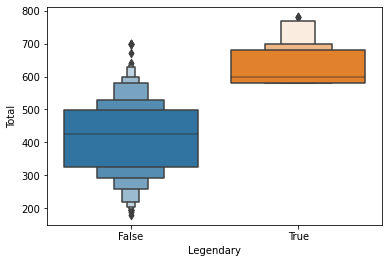

In [10]:
sns.boxenplot(data=pokemon, x='Legendary', y='Total')

In [11]:
# Your code here:

ttest_ind(pokemon[pokemon['Legendary'] == True]['Total'], pokemon[pokemon['Legendary'] == False]['Total'])



Ttest_indResult(statistic=16.386116965872425, pvalue=3.0952457469652825e-52)

What do you conclude from this test? Write your conclusions below.

In [12]:
# Your conclusions here:

# That the distribution of the points is not equal


How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [13]:
# Your code here:

pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [14]:
# Your code here:

pokemon[pokemon['Type 1'] == 'Water']['Total'].describe()

count    112.000000
mean     430.455357
std      113.188266
min      200.000000
25%      328.750000
50%      455.000000
75%      502.250000
max      770.000000
Name: Total, dtype: float64

In [15]:
pokemon[pokemon['Type 1'] != 'Water']['Total'].describe()


count    688.000000
mean     435.859012
std      121.091682
min      180.000000
25%      330.000000
50%      450.000000
75%      515.000000
max      780.000000
Name: Total, dtype: float64

Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [16]:
# Your code here:

ttest_ind(pokemon[pokemon['Type 1'] == 'Water']['Total'], pokemon[pokemon['Type 1'] != 'Water']['Total'])


Ttest_indResult(statistic=-0.4418547448849676, pvalue=0.6587140317488793)

Write your conclusion below.

In [17]:
# Your conclusions here:

# Cannot reject the null, therefore, yes, they are similar

# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [18]:
from scipy.stats import ttest_rel

In [19]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [20]:
# Your code here:
ttest_rel(pokemon.Attack, pokemon.Defense)


Ttest_relResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

In [21]:
pokemon[['Attack', 'Defense']].describe()

,Attack,Defense
count,800.000000,800.000000
mean,79.001250,73.842500
std,32.457366,31.183501
min,5.000000,5.000000
25%,55.000000,50.000000
50%,75.000000,70.000000
75%,100.000000,90.000000
max,190.000000,230.000000


Describe the results of the test in the cell below.

In [22]:
# Your conclusions here:

#Yes, they are different,  mean is not the same

We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [23]:
# Your code here:
ttest_rel(pokemon.Attack.mean(), pokemon.Defense.mean())


c:\Users\52551\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\52551\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_relResult(statistic=nan, pvalue=nan)

In [24]:
pokemon[['Attack', 'Defense']].describe()


,Attack,Defense
count,800.000000,800.000000
mean,79.001250,73.842500
std,32.457366,31.183501
min,5.000000,5.000000
25%,55.000000,50.000000
50%,75.000000,70.000000
75%,100.000000,90.000000
max,190.000000,230.000000


Describe the results of the test in the cell below.

In [25]:
# Your conclusions here:

# Mean of both columns are not the same

As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [26]:
from scipy.stats import ttest_1samp

In [28]:
# Your code here:
ttest_1samp(pokemon.Attack - pokemon.Defense, 0)


Ttest_1sampResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [17]:
# Your code here:



Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [18]:
# Your code here:



Based on a 95% confidence, should we reject the null hypothesis?

In [19]:
# Your answer here:

